In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

In [4]:
#from igraph import *
#from MulticoreTSNE import MulticoreTSNE as TSNE #faster TSNE alternative
#from anndata import read_h5ad
#from anndata import read_csv
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from scipy.stats import entropy
from math import log, e

In [6]:
# results_file = 'C:/Users/sruth/Box/Pitt/Tabula Muris senis- for proposal/processed h5ad files-figshare/tabula-muris-senis-facs-processed-official-annotations-Limb_Muscle.h5ad'  # the file that will store the analysis results
# adata = sc.read_h5ad(results_file)

results_file = 'D:/OneDrive - University of Pittsburgh/PhD proposal/Noisy channel research/files_from_box/tabula-muris-senis-facs-processed-official-annotations-Limb_Muscle.h5ad'  # the file that will store the analysis results
adata = sc.read_h5ad(results_file)

C:\Users\SRS204\Anaconda3\lib\site-packages\anndata\compat\__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
C:\Users\SRS204\Anaconda3\lib\site-packages\anndata\compat\__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [9]:
# TMS single FACS data 
# male and female mixed
# eliminated genes - which did not satisfy: minimum 10 non zero cells

#labPC
file='D:/OneDrive - University of Pittsburgh/PhD proposal/Noisy channel research/nonzero_10cutoff_facscountmatrix8dec.csv'

adata_facs_df= pd.read_csv(file,index_col=0)

In [10]:
# alltfdf=pd.read_csv("C:/Users/sruth/Box/Pitt/Tabula Muris senis- for proposal/Noisy channel-TMS research/trrust_rawdata.mouse_wheader.csv")

alltfdf=pd.read_csv("D:/OneDrive - University of Pittsburgh/PhD proposal/Noisy channel research/files_from_box/trrust_rawdata.mouse_wheader.csv")


In [11]:
adata.obs['mouse.id'].unique()

['18_46_F', '18_47_F', '18_45_M', '18_53_M', '24_59_M', ..., '3_11_M', '3_8_M', '3_39_F', '3_10_M', '3_9_M']
Length: 14
Categories (14, object): ['3_8_M', '3_9_M', '3_10_M', '3_11_M', ..., '24_58_M', '24_59_M', '24_60_M', '24_61_M']

In [12]:
sc_facs=adata_facs_df

sc_facs.index=list(adata.obs.index.values)
#sc_facs.columns=list(adata.var.index.values)

sc_facs['age']=list(adata.obs.age)
sc_facs['animal_id']=list(adata.obs['mouse.id'])
sc_facs['celltype']=list(adata.obs.cell_ontology_class)
sc_facs['sex']=list(adata.obs.sex)

In [13]:
age1m_df=sc_facs[sc_facs['age']=='1m']
age3m_df=sc_facs[sc_facs['age']=='3m']
age18m_df=sc_facs[sc_facs['age']=='18m']
age21m_df=sc_facs[sc_facs['age']=='21m']
age24m_df=sc_facs[sc_facs['age']=='24m']
age30m_df=sc_facs[sc_facs['age']=='30m']

In [14]:
unique_dict={}
test_list=dict(zip(list(alltfdf['TF genes']),list(alltfdf['Non-TF genes'])))
for item in test_list.items():
    if item not in unique_dict:
        unique_dict.update({item})
    

len(unique_dict) 

827

In [15]:
age3m_df.head()

,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,0610009O20Rik,...,Zwint,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,age,celltype,animal_id,sex
A1.B002765.3_38_F.1.1-1-1,1.761105,1.541098,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,1.522642,0.0,0.000000,1.806709,0.000000,0.000000,3m,skeletal muscle satellite cell,3_38_F,female
A1.D042103.3_11_M.1-1-1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3m,skeletal muscle satellite cell,3_11_M,male
A1.D042186.3_8_M.1.1-1-1,0.000000,1.788955,0.0,0.0,0.0,0.0,0.000000,0.384158,0.0,0.000000,...,0.000000,0.0,0.161871,1.352870,1.701163,0.289918,3m,skeletal muscle satellite cell,3_8_M,male
A10.B002765.3_38_F.1.1-1-1,0.000000,3.050025,0.0,0.0,0.0,0.0,0.000000,1.533476,0.0,0.000000,...,0.025267,0.0,0.000000,0.000000,0.000000,0.000000,3m,skeletal muscle satellite cell,3_38_F,female
A10.B002769.3_39_F.1.1-1-1,1.564775,0.000000,0.0,0.0,0.0,0.0,2.696855,0.817633,0.0,1.073734,...,0.000000,0.0,0.029860,0.719527,0.024443,0.000000,3m,skeletal muscle satellite cell,3_39_F,female


# Finding entropy after summing expression of all cells Figure 1A and supplemental figure 1

C:\Users\sruth\Box\Sruthi.RNA-seq\shannon_entropy_Tim_17jun

    Original location for sarcopenia bulk RNA seq data

In [16]:
from scipy.stats import entropy


In [17]:
age3m = age3m_df.drop(['age','celltype'], axis=1)
age3m_mean= age3m.mean(axis = 0, skipna = True)
age3m_mean_animal=age3m.groupby('animal_id').mean()
age3m_total= age3m.sum(axis = 0, skipna = True)
age3m_total.drop(['animal_id','sex'],inplace=True)


C:\Users\SRS204\AppData\Local\Temp/ipykernel_7308/3675212856.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  age3m_mean= age3m.mean(axis = 0, skipna = True)


In [18]:
age18m = age18m_df.drop(['age','celltype'], axis=1)
age18m_mean= age18m_df.mean(axis = 0, skipna = True)
age18m_mean_animal=age18m.groupby('animal_id').mean()
age18m_total= age18m.sum(axis = 0, skipna = True)

age18m_total.drop(['animal_id','sex'], inplace=True)


C:\Users\SRS204\AppData\Local\Temp/ipykernel_7308/526523095.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  age18m_mean= age18m_df.mean(axis = 0, skipna = True)


In [19]:
age24m = age24m_df.drop(['age','celltype'], axis=1)
age24m_mean= age24m.mean(axis = 0, skipna = True)
age24m_mean_animal=age24m.groupby('animal_id').mean()
age24m_total= age24m.sum(axis = 0, skipna = True)

age24m_total.drop(['animal_id','sex'], inplace=True)

C:\Users\SRS204\AppData\Local\Temp/ipykernel_7308/3955675451.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  age24m_mean= age24m.mean(axis = 0, skipna = True)


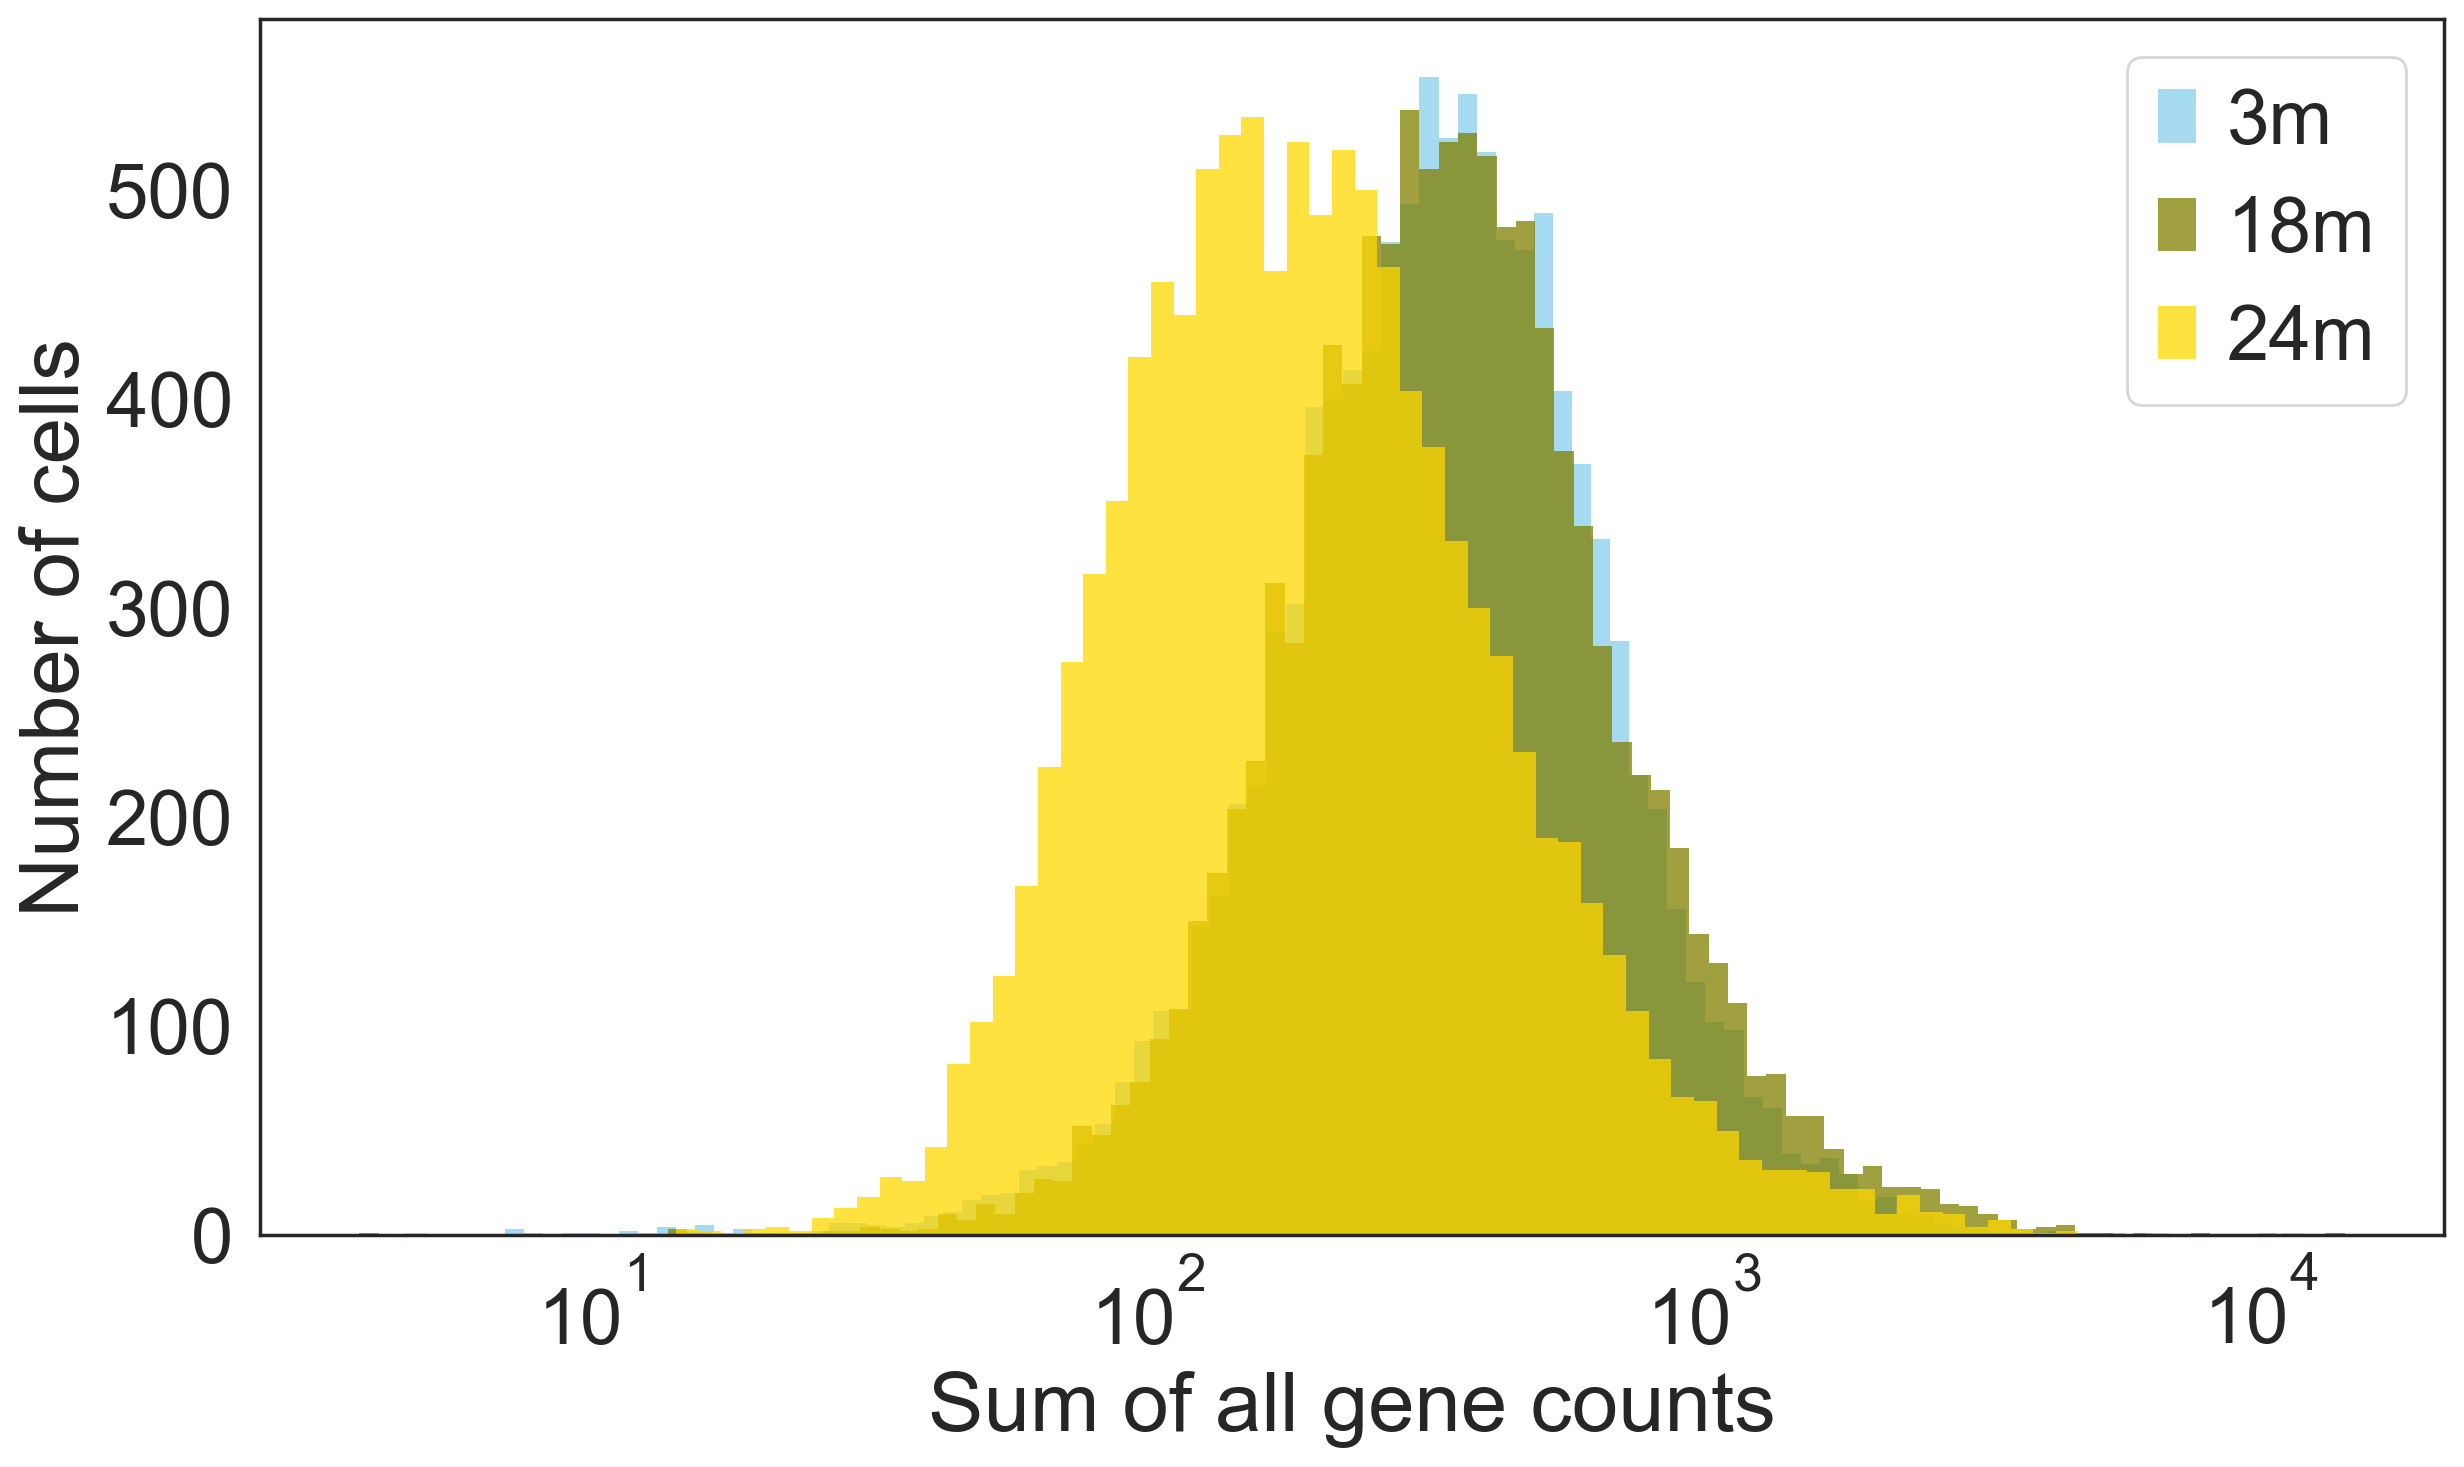

In [20]:
sns.set(font_scale = 2.5)
sns.set_style("white")
plt.rcParams['patch.edgecolor'] = 'none'
plt.figure(figsize=(14, 8))
plt.rcParams.update({'font.size': 22,'font.family':'sans-serif'})

ax=sns.histplot(age3m_total, log_scale=True, color="skyblue",label='3m')
ax=sns.histplot(age18m_total,log_scale=True, color="olive", label='18m')
ax=sns.histplot(age24m_total, log_scale=True,color="gold", label='24m')
ax.legend()

plt.xscale('log')
plt.xlabel('Sum of all gene counts')
plt.ylabel('Number of cells')
# #plt.xlim(0.01,10)
# plt.show()

plt.savefig('SuppFig1_totalgenecounts.png', dpi=300)

In [21]:
age3m_mean

0610007C21Rik    0.562583
0610007L01Rik    0.616423
0610007N19Rik    0.261602
0610007P08Rik    0.241204
0610007P14Rik    0.271822
                   ...   
Zxdc             0.270104
Zyg11b           0.349982
Zyx              0.711595
Zzef1            0.304026
Zzz3             0.398686
Length: 10835, dtype: float64

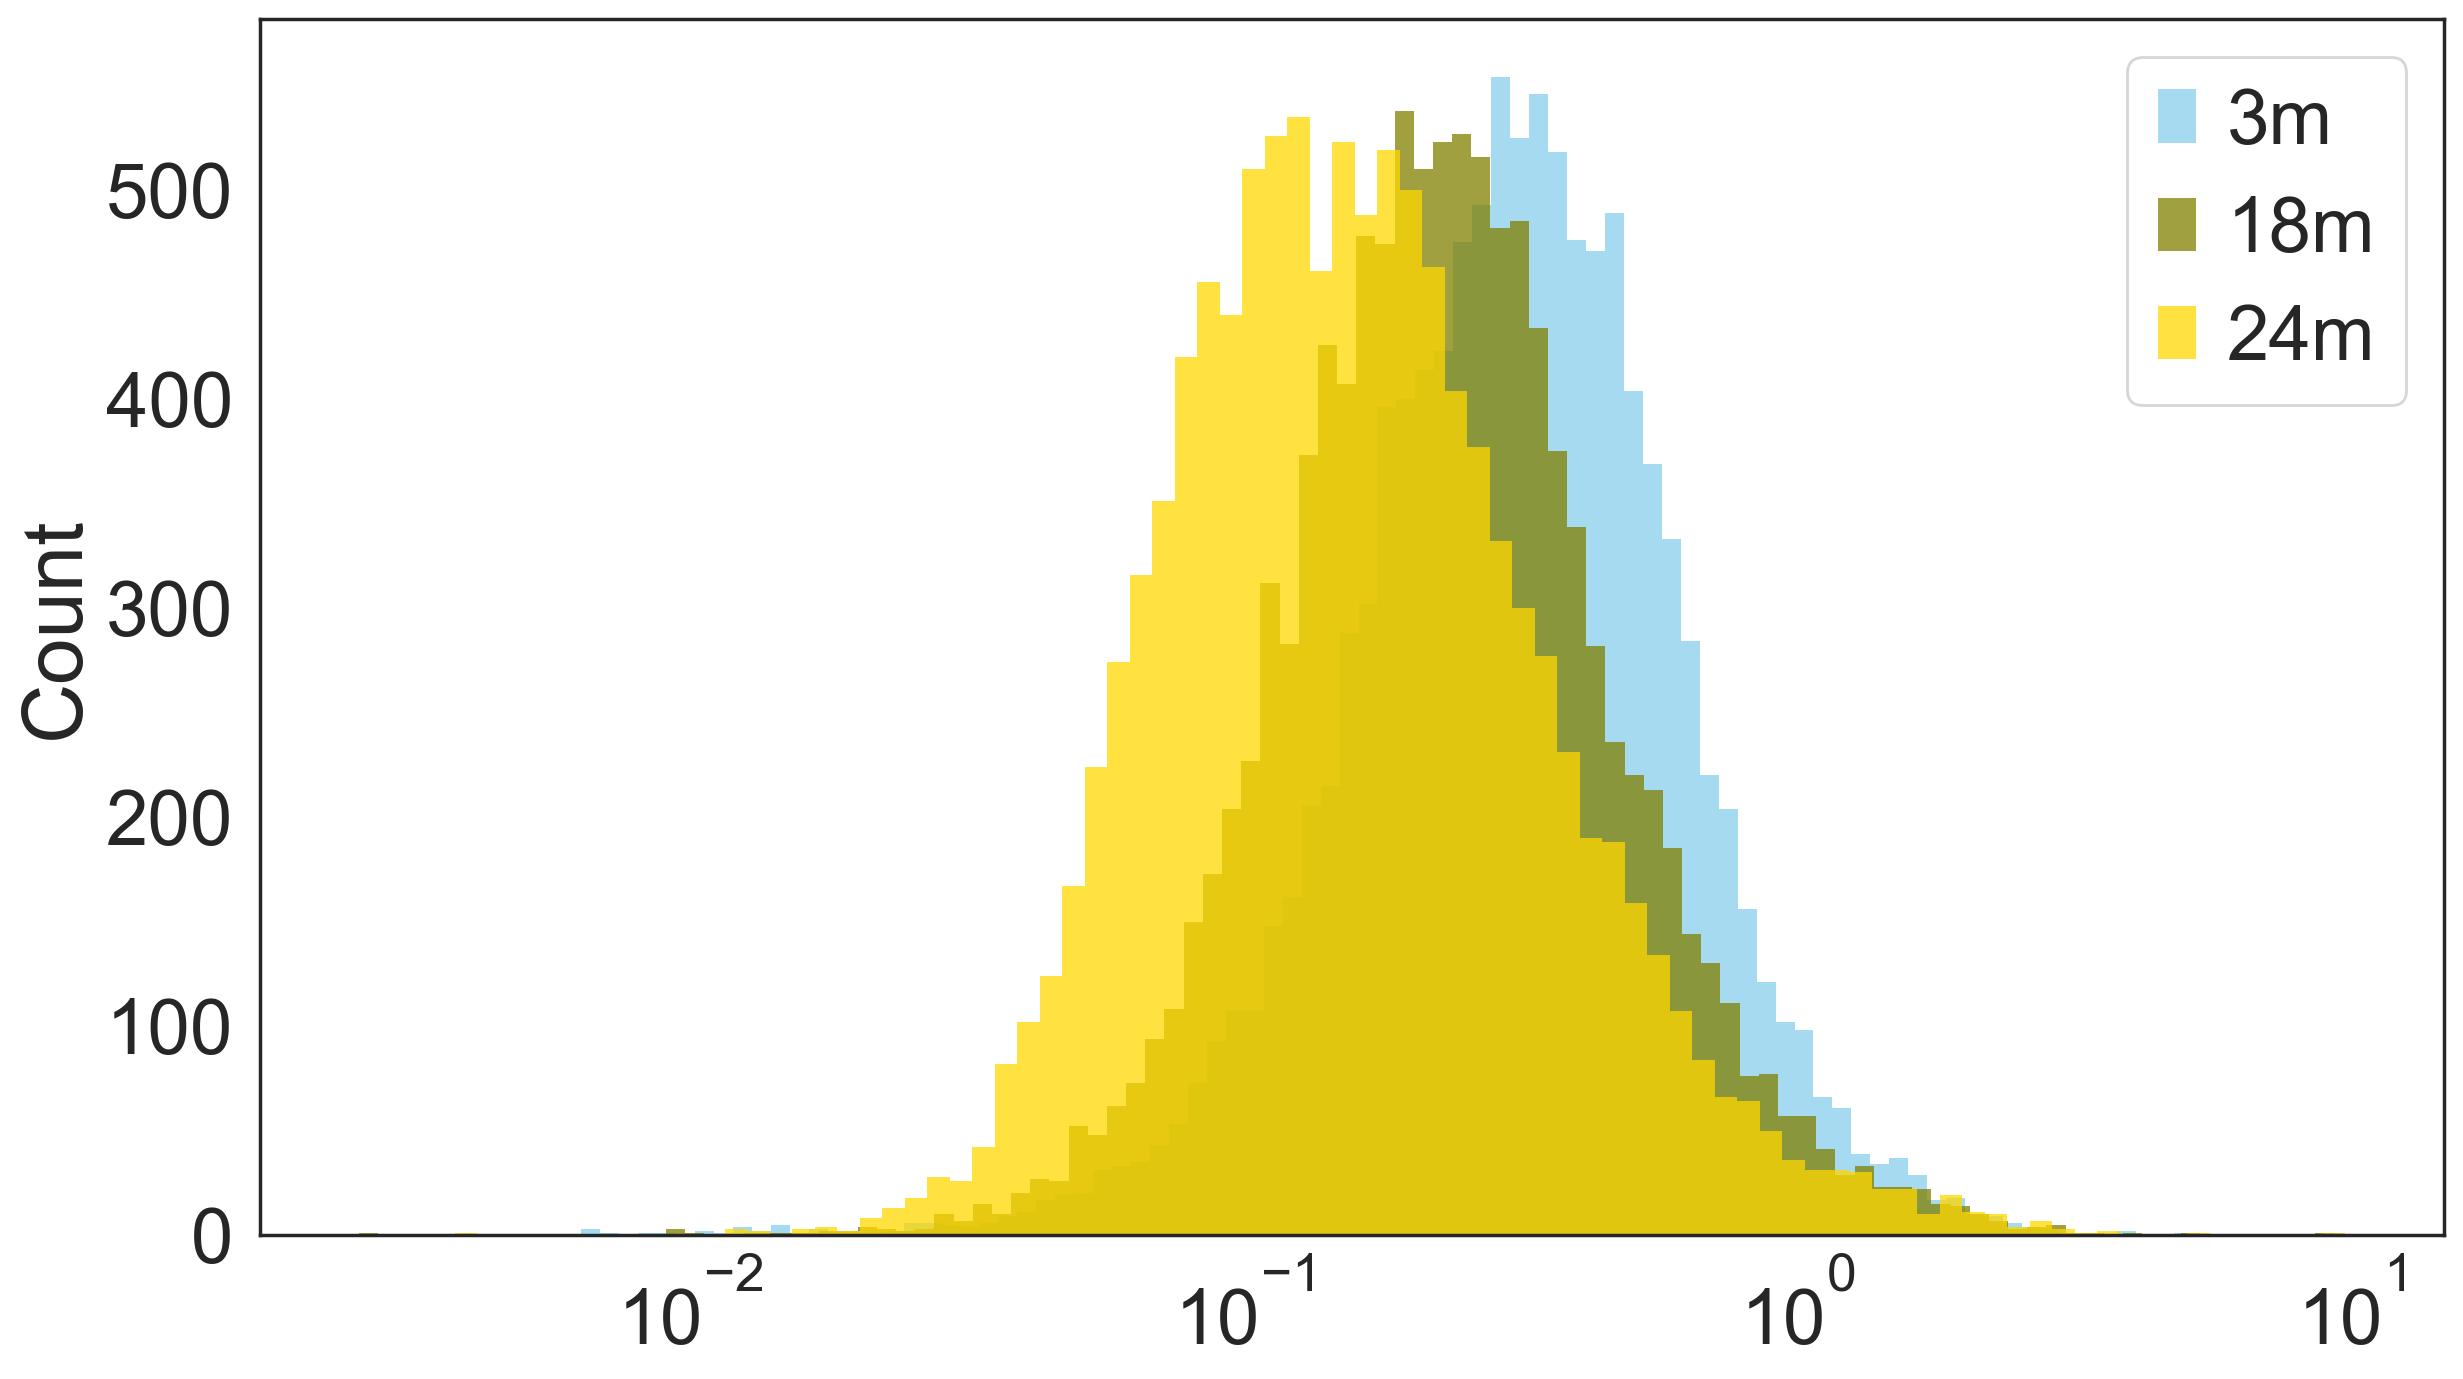

In [22]:
sns.set(font_scale = 2.5)
sns.set_style("white")
plt.rcParams['patch.edgecolor'] = 'none'
plt.figure(figsize=(14, 8))
plt.rcParams.update({'font.size': 22,'font.family':'sans-serif'})

ax=sns.histplot(age3m_mean, log_scale=True, color="skyblue",label='3m')
ax=sns.histplot(age18m_mean,log_scale=True, color="olive", label='18m')
ax=sns.histplot(age24m_mean, log_scale=True,color="gold", label='24m')
ax.legend()

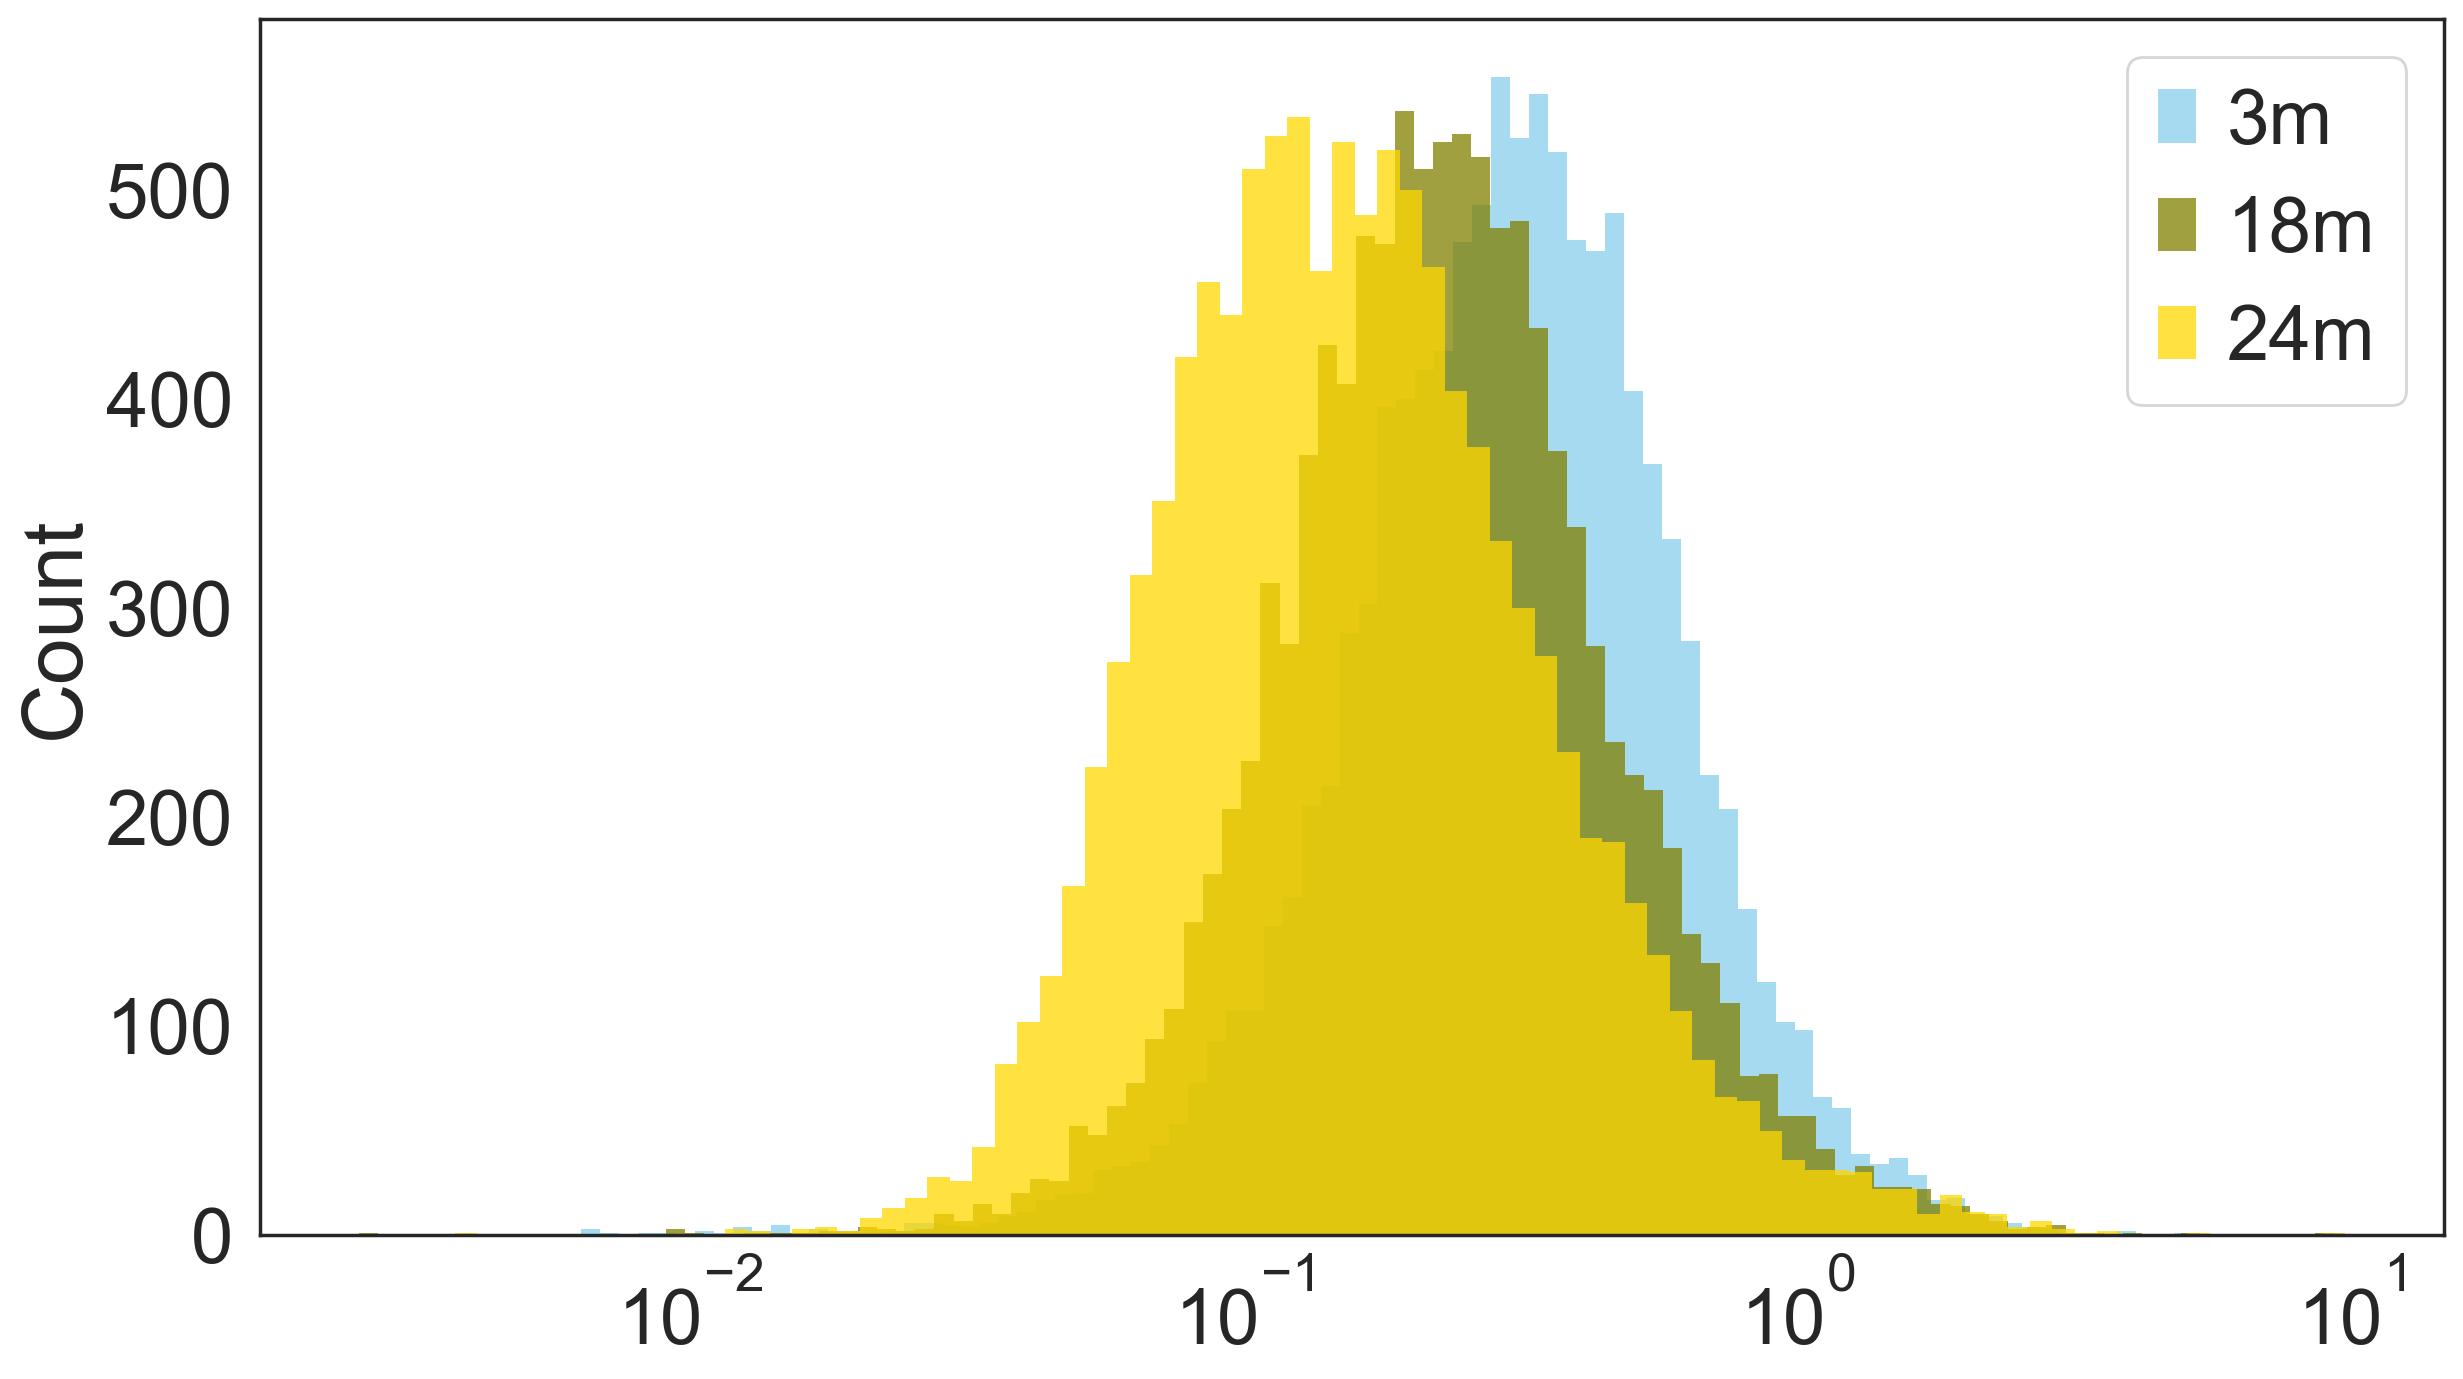

In [23]:
sns.set(font_scale = 2.5)
sns.set_style("white")
plt.rcParams['patch.edgecolor'] = 'none'
plt.figure(figsize=(14, 8))
plt.rcParams.update({'font.size': 22,'font.family':'sans-serif'})

ax=sns.histplot(age3m_mean, log_scale=True, color="skyblue",label='3m')
ax=sns.histplot(age18m_mean,log_scale=True, color="olive", label='18m')
ax=sns.histplot(age24m_mean, log_scale=True,color="gold", label='24m')
ax.legend()